In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
offers = pd.read_csv('datasets/data_offers.csv')
orders = pd.read_csv('datasets/data_orders.csv')

In [16]:
df = orders.merge(offers, how = 'inner', on='order_gk')

In [17]:
df.sample(10)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
27679,08:48:08,-0.966698,51.453422,NaN,3000577176915,4,0,209.0,300050811141
20053,21:38:54,-1.046741,51.479820,NaN,3000596371413,4,0,32.0,300051564121
101,20:30:04,-0.971564,51.458022,60.0,3000632445939,4,1,27.0,300052382503
13947,16:00:28,-0.950995,51.475183,NaN,3000554921993,9,0,NaN,300050691723
9040,22:05:48,-0.986542,51.420305,NaN,3000590082286,4,0,245.0,300051309609
1377,08:06:35,-0.989201,51.472551,NaN,3000592122059,4,0,205.0,300051357872
10981,04:06:32,-0.942939,51.440820,631.0,3000630930875,4,1,132.0,300052323269
1599,20:45:07,-0.941320,51.450442,297.0,3000600036316,4,1,340.0,300051691368
4595,23:08:56,-0.942839,51.440365,NaN,3000627507531,4,0,135.0,300052091361
29756,03:28:03,-0.968125,51.450664,NaN,3000617700466,4,0,60.0,300051731834


In [18]:
df.shape

(31268, 9)

In [19]:
df['is_driver_assigned'] = np.where(df['is_driver_assigned_key'] == 1, 'Yes', 'No')
df['order_status'] = np.where(df['order_status_key'] == 4, 'Client Cancelled', 'System Reject')

df.drop(columns=['is_driver_assigned_key', 'order_status_key'], inplace = True)

In [20]:
df = df.rename(columns=
              {
                  'order_datetime' : 'order_time'
              })

In [21]:
df.sample(10)

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status
24610,09:33:24,-0.976229,51.418598,177.0,3000589130913,45.0,300051253742,Yes,Client Cancelled
15397,05:44:31,-0.985203,51.457273,NaN,3000598360631,177.0,300051604894,No,Client Cancelled
6703,14:53:58,-0.956998,51.449458,298.0,3000578626493,159.0,300050890061,Yes,Client Cancelled
21383,15:32:05,-0.945592,51.448456,NaN,3000554271052,NaN,300050661432,No,System Reject
29400,21:03:30,-0.948261,51.448439,NaN,3000618126374,175.0,300051746173,No,Client Cancelled
2632,22:17:00,-0.969813,51.448356,NaN,3000623792999,NaN,300051871860,No,System Reject
24552,21:22:38,-0.963068,51.447149,NaN,3000599387182,222.0,300051662187,No,Client Cancelled
27614,15:21:41,-0.946734,51.447946,NaN,3000629257811,160.0,300052218418,No,Client Cancelled
18303,23:03:51,-0.966745,51.453236,NaN,3000588157442,104.0,300051205558,No,Client Cancelled
9170,08:45:33,-0.963060,51.444170,60.0,3000624767664,174.0,300051930998,Yes,Client Cancelled


#### Q.1 Build up a distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?

<Axes: >

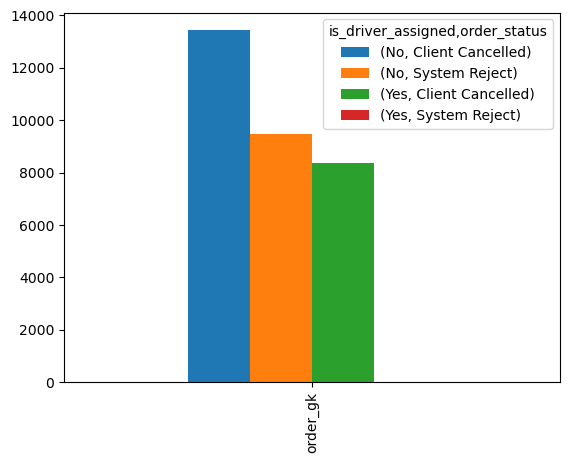

In [29]:
df.pivot_table(columns = ['is_driver_assigned', 'order_status'], values='order_gk', aggfunc='count').plot(kind='bar', legend=True)

In [33]:
df.groupby(by=['is_driver_assigned', 'order_status'])['order_gk'].count()

is_driver_assigned  order_status    
No                  Client Cancelled    13435
                    System Reject        9469
Yes                 Client Cancelled     8360
                    System Reject           4
Name: order_gk, dtype: int64

# ~ `Observations`

### Question 2

#### Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?

In [34]:
df['order_hours'] = df['order_time'].str.split(':').apply(lambda split: split[0])

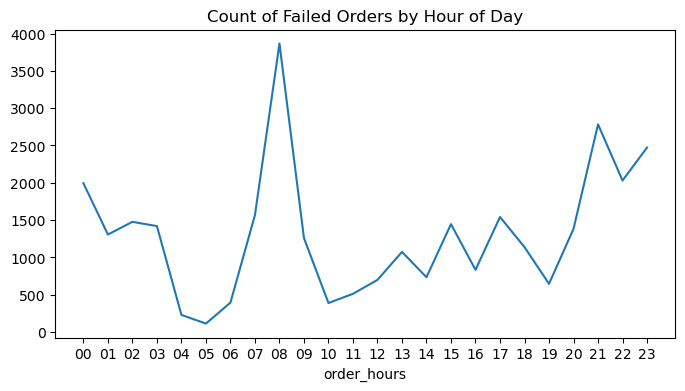

In [49]:
df.groupby(by='order_hours')['order_gk'].count().plot(figsize=(8, 4), xticks = range(0, 24), title="Count of Failed Orders by Hour of Day")
plt.show()

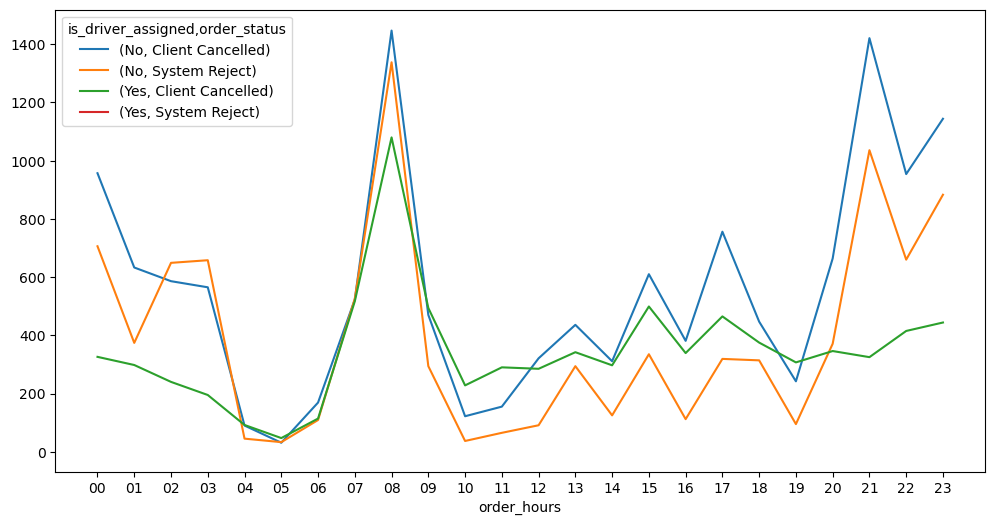

In [65]:
grp = df.groupby(by=['order_hours', 'is_driver_assigned', 'order_status'])['order_gk'].count()
pivot = grp.reset_index().pivot(index="order_hours", columns=["is_driver_assigned", "order_status"], values="order_gk")
pivot.plot(figsize = (12, 6), xticks = range(0, 24))
plt.show()

### Question 3
#### Plot the average time to cancellation with and without driver, by hour. Can we draw any conclusions from this plot?

In [77]:
df.head()

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status,order_hours
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,198.0,300050983403,Yes,Client Cancelled,18
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986179,No,Client Cancelled,20
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986174,No,Client Cancelled,20
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986180,No,Client Cancelled,20
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,46.0,300050976275,Yes,Client Cancelled,12


In [90]:
grp = df.groupby(['order_hours', 'is_driver_assigned'])['cancellations_time_in_seconds'].mean().reset_index()

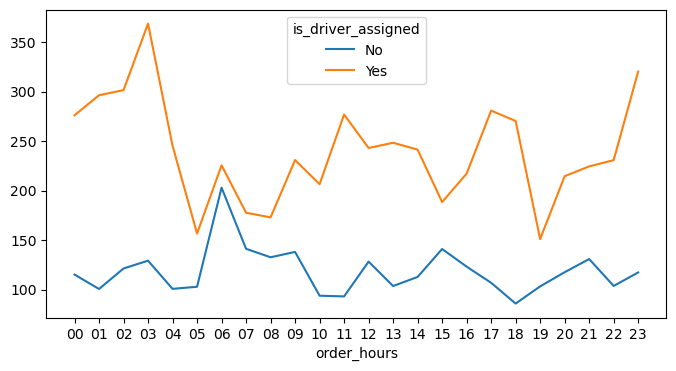

In [94]:
pivot = grp.pivot_table(index = 'order_hours', columns = ['is_driver_assigned'], values = 'cancellations_time_in_seconds')
pivot.plot(figsize = (8, 4), xticks = range(0, 24))
plt.show()

### Question 4
#### Plot the distribution of average ETA by hours. How can this plot be explained?

In [95]:
df.head()

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status,order_hours
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,198.0,300050983403,Yes,Client Cancelled,18
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986179,No,Client Cancelled,20
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986174,No,Client Cancelled,20
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986180,No,Client Cancelled,20
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,46.0,300050976275,Yes,Client Cancelled,12


<Axes: >

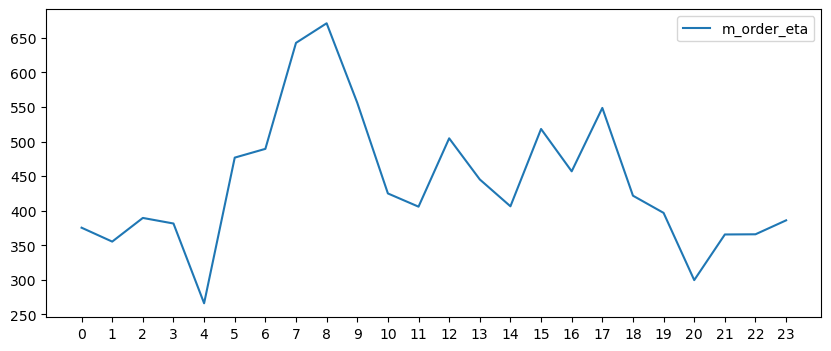

In [106]:
df.groupby(['order_hours'])['m_order_eta'].mean().reset_index().plot(figsize = (10, 4), xticks = range(0, 24))